In [1]:
import sys
import os

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
modules_dir = os.path.join(os.path.dirname(notebook_dir), 'modules')

if modules_dir not in sys.path:
    sys.path.append(modules_dir)

from analysis import *
from get_data import *
from patent_descriptive import Patent_Descriptive

data_path = "./data"

## First Appear Analysis

Year
1837    9
1838    5
1839    1
1840    1
1841    1
       ..
2015    1
2016    1
2018    3
2020    1
2021    1
Length: 136, dtype: int64


/Users/liusimin/Desktop/Gun Safety/python_code/GunSafety_pkg/modules/patent_descriptive.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[target] = data[target].astype(str)


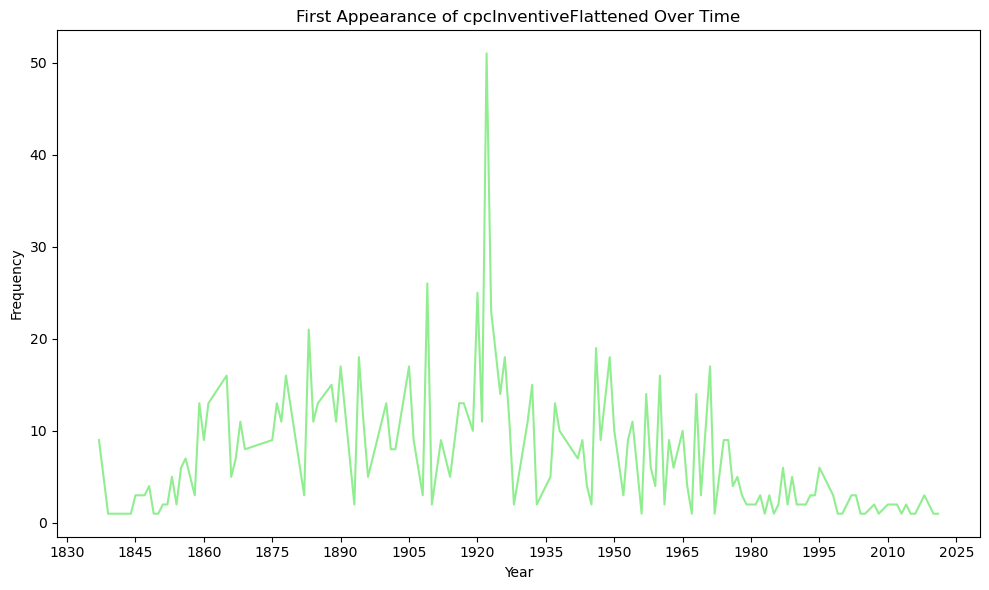

In [2]:
all_patents = get_patents()

data_01 = Patent_Descriptive(data = all_patents)
data_01.reformat()
data_01.data = data_01.separate_category(data = data_01.data)
F41 = data_01.data.loc[(data_01.data['category'] == 'F') & (data_01.data['subcategory1'] == '41')]
fa = data_01.first_appear(data = F41, target = 'cpcInventiveFlattened')

Year
1950    229
1952     85
1953    109
1954     34
1956      7
1957     87
1958     23
1959     10
1960     56
1961      9
1962     27
1963     17
1965     21
1966     11
1967      3
1968     36
1969      6
1970      3
1971     36
1972      2
1973     17
1974     14
1975     17
1976      8
1977      8
1978      7
1979      5
1980      4
1981      3
1982      4
1983      2
1984      7
1985      3
1986      6
1987      7
1988      2
1989      7
1990      2
1991      4
1992      3
1993      3
1994      4
1995      7
1997      1
1998      4
1999      1
2000      1
2002      3
2003      4
2004      2
2005      1
2007      3
2008      1
2010      2
2012      2
2013      2
2014      2
2015      1
dtype: int64


/Users/liusimin/Desktop/Gun Safety/python_code/GunSafety_pkg/modules/patent_descriptive.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[target] = data[target].astype(str)


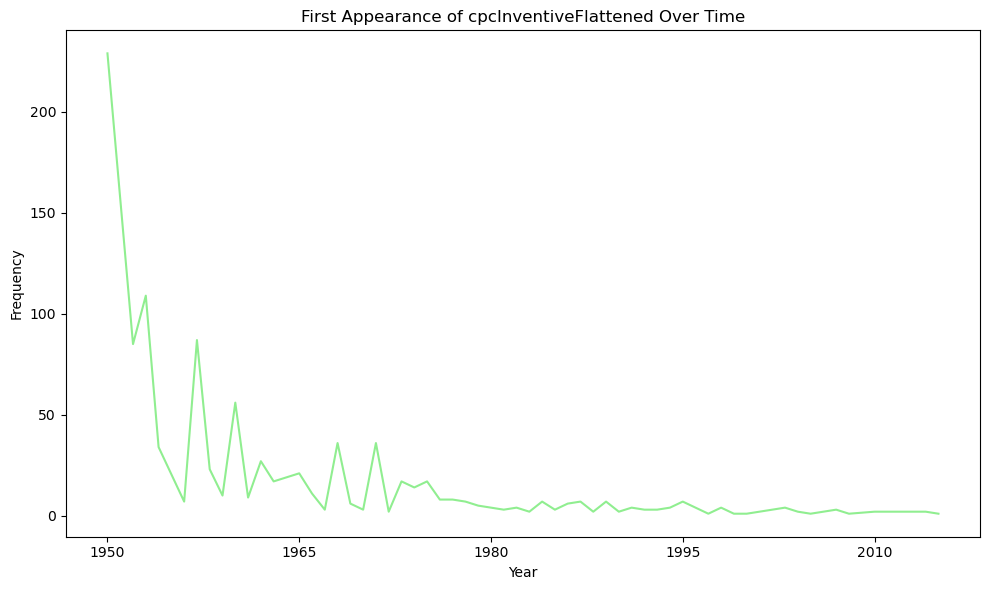

In [3]:
requirements = ("1950-01-01", "2015-12-31")
subsettede_patents = subset_patents("datePublished", requirements)
subsettede_patents.head()
data_02 = Patent_Descriptive(data = subsettede_patents)
data_02.data = data_02.separate_category(data = data_02.data)
F41 = data_02.data.loc[(data_02.data['category'] == 'F') & (data_02.data['subcategory1'] == '41')]
fa = data_02.first_appear(data = F41, target = 'cpcInventiveFlattened')

## Temporal Dynamics analysis

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


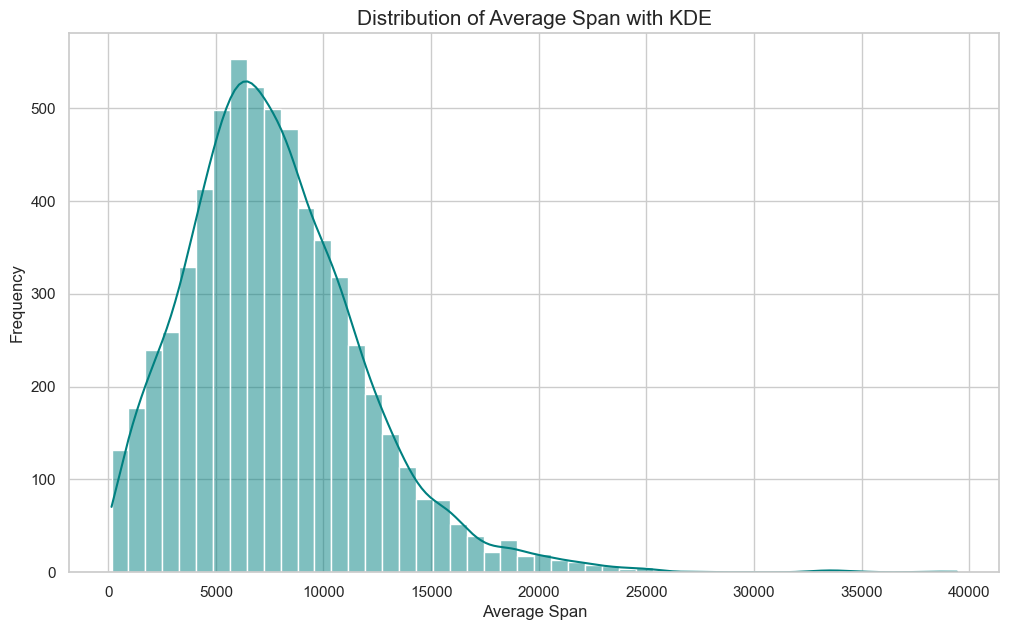

In [4]:
data_path = "../data"
# first_appear_analysis(data_path)
# compute_patent_citation_span(data_path)
plot_distribution_2(path_to_data=data_path, save=False)

In [5]:
# global df_basics
# global df_edge_list

# path_to_data="../data"
# df_edge_list = pd.read_csv(os.path.join(path_to_data, "raw/edge_list.csv"))
# df_basics = pd.read_csv(os.path.join(path_to_data, "raw/df_basics.csv"))
# dge_list = compute_edge_list(df_edge_list)
# average_span(path_to_data=path_to_data)
# # plot_distribution(path_to_data=path_to_data)
# plot_distribution_2(path_to_data=path_to_data)

## Network Analysis
Impossible to analyze everything, and from 30k to identify the important patents we can use, because of the references (unique feature)
What influences firearm innovation?

how: 2m --> Outside of F41

In [2]:
print(os.listdir('../data/'))
import pandas as pd

['.DS_Store', 'intermediate', 'processed', 'raw']


subsetting edge list
removing rows
adding edges


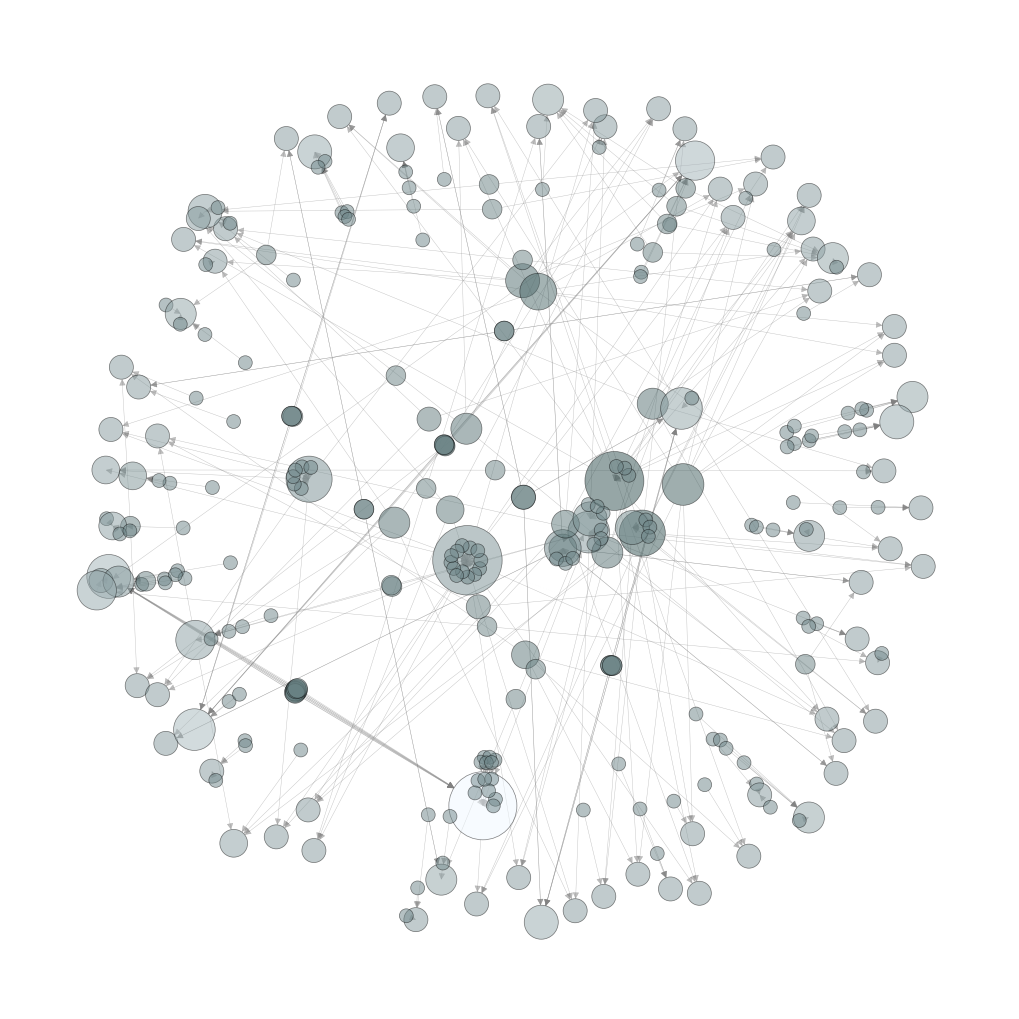

In [3]:
import json
edge_list = pd.read_csv("../data/raw/edge_list.csv")
plotter = network_plot(edge_list=edge_list)
with open('../config.json') as f:
    ids = json.load(f)['network_id_02']
plotter.plot_network(ids=ids)